<a href="https://colab.research.google.com/github/iamajam18/DIP_PROJECT_PES1UG22EC317/blob/main/DIP_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 19.2 MB/s eta 0:00:00


PSNR between original and noisy image: 31.24 dB
PSNR between original and Median image: 47.13 dB
PSNR between original and Mean Denoising image: 38.75 dB
PSNR between original and Anisotropic Filter image: 10.04 dB
PSNR between original and Wavelet Denoising image: 38.38 dB


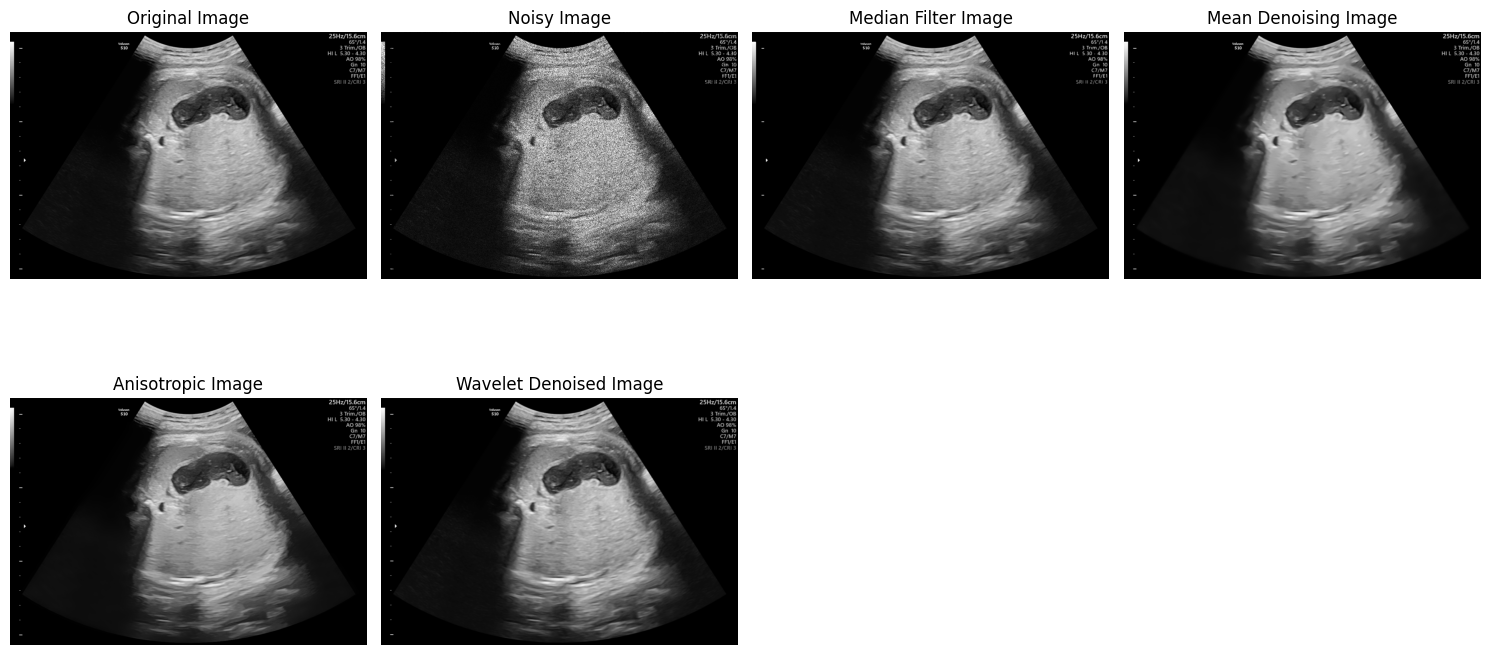

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import restoration
import pywt

# Load the ultrasound image (grayscale)
image = cv2.imread(r"/content/Patient01788_Plane2_1_of_1.png", 0)
image = image / 255.0  # Normalize to range [0, 1]


# Function to add speckle noise
def add_speckle_noise(image, variance=0.04):
    noise = np.random.normal(0, np.sqrt(variance), image.shape)
    noisy_image = image + image * noise
    noisy_image = np.clip(noisy_image, 0, 1)  # Clip values to range [0, 1]
    return noisy_image


# Function to calculate PSNR
def calculate_psnr(original, noisy, max_pixel=255.0):
    mse = np.mean((original - noisy) ** 2)
    if mse == 0:
        return float('inf')  # Perfect match
    psnr = 10 * np.log10(max_pixel ** 2 / mse)
    return psnr


# Add speckle noise
speckle_variance = 0.3
noisy_image = add_speckle_noise(image, variance=speckle_variance)

# Convert images to 8-bit format for PSNR calculation
original_image_uint8 = (image * 255).astype(np.uint8)                           #Many image processing libraries and metrics, including PSNR, are typically designed
noisy_image_uint8 = (noisy_image * 255).astype(np.uint8)                        #for images with integer pixel values ranging from 0 to 255 (for 8-bit images).

# Calculate PSNR for noisy image
psnr_noisy = calculate_psnr(original_image_uint8, noisy_image_uint8)
print(f"PSNR between original and noisy image: {psnr_noisy:.2f} dB")

# applying filters
median_image = cv2.medianBlur(original_image_uint8, ksize=3)
mean_denoising_image = cv2.fastNlMeansDenoising(original_image_uint8, None, 10, 7, 21)
anisotropic_image = restoration.denoise_bilateral(image, sigma_color=0.03, sigma_spatial=7)


# Wavelet transform
def wavelet_denoising(image, wavelet='db1', level=1, threshold=0.04):
    coeffs = pywt.wavedec2(image, wavelet, level=level)

    # soft thresholding
    coeffs_thresholded = list(coeffs)

    for i in range(1, len(coeffs_thresholded)):
        coeffs_thresholded[i] = tuple(pywt.threshold(c, threshold, mode='soft') for c in coeffs_thresholded[i])

    # Reconstructed image
    denoised_image = pywt.waverec2(coeffs_thresholded, wavelet)

    return np.clip(denoised_image, 0, 1)  # Clip to valid image range


# wavelet denoising
wavelet_image = wavelet_denoising(image)

# Resize wavelet image
wavelet_image_resized = cv2.resize(wavelet_image, (image.shape[1], image.shape[0]))

# Calculate PSNR for filtered image
psnr_filtered = calculate_psnr(original_image_uint8, median_image)
print(f"PSNR between original and Median image: {psnr_filtered:.2f} dB")

psnr_filtered = calculate_psnr(original_image_uint8, mean_denoising_image)
print(f"PSNR between original and Mean Denoising image: {psnr_filtered:.2f} dB")

psnr_filtered = calculate_psnr(original_image_uint8, anisotropic_image)
print(f"PSNR between original and Anisotropic Filter image: {psnr_filtered:.2f} dB")

psnr_filtered = calculate_psnr(original_image_uint8, (wavelet_image_resized * 255).astype(np.uint8))
print(f"PSNR between original and Wavelet Denoising image: {psnr_filtered:.2f} dB")

# Display
plt.figure(figsize=(15, 8))
plt.subplot(2, 4, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.title("Noisy Image")
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.title("Median Filter Image")
plt.imshow(median_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.title("Mean Denoising Image")
plt.imshow(mean_denoising_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.title("Anisotropic Image")
plt.imshow(anisotropic_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.title("Wavelet Denoised Image")
plt.imshow(wavelet_image_resized, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


For 8-bit images, a PSNR above 30 dB is generally considered good, and values above 40 dB are considered excellent.

PSNR after Wavelet Denoising: 41.26 dB
PSNR after Mean Denoising: 37.48 dB
PSNR after Median Filtering: 37.18 dB
PSNR after Hybrid Image: 37.18 dB


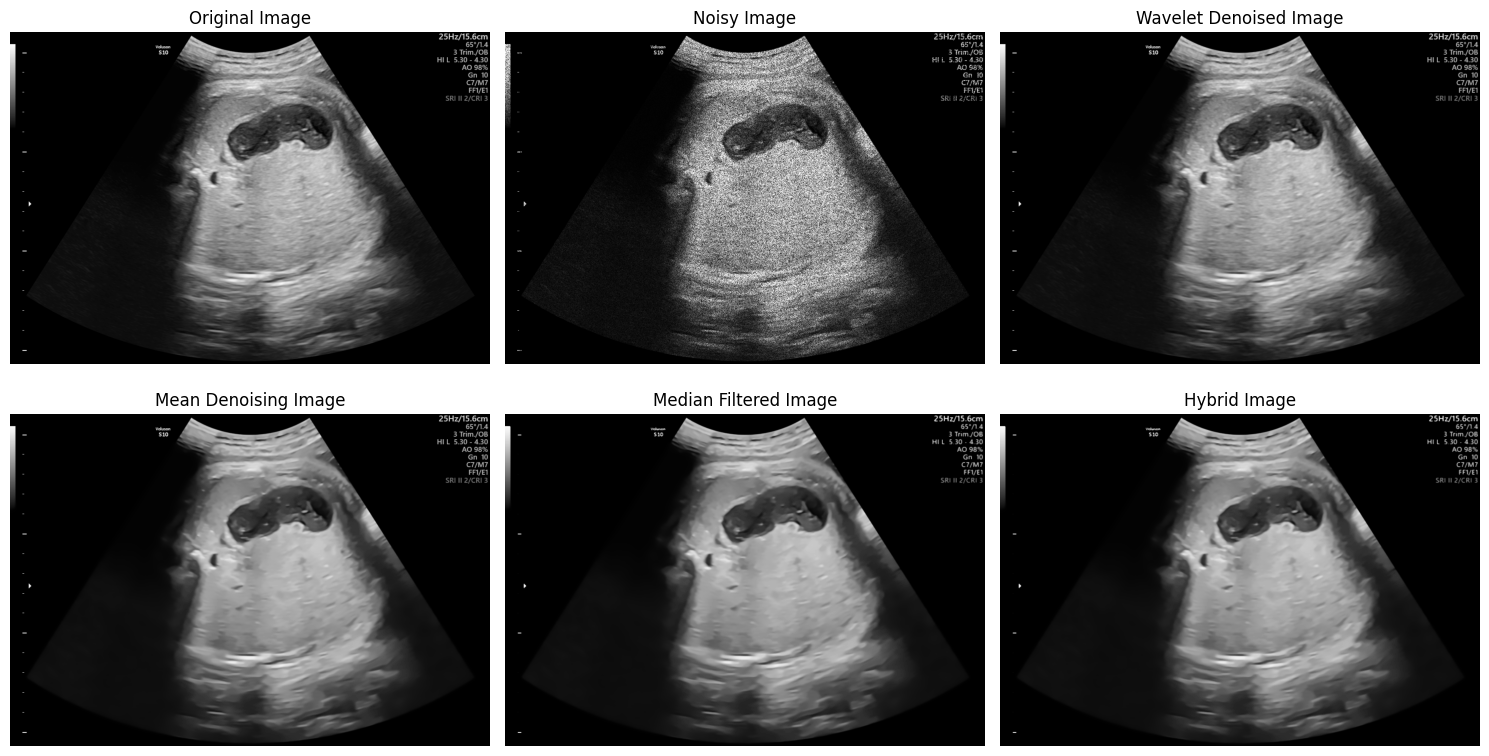

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import restoration
import pywt

# Load the ultrasound image (grayscale)
image = cv2.imread(r"/content/Patient01788_Plane2_1_of_1.png", 0)
image = image / 255.0  # Normalize to range [0, 1]

# Function to add speckle noise
def add_speckle_noise(image, variance=0.04):
    noise = np.random.normal(0, np.sqrt(variance), image.shape)
    noisy_image = image + image * noise
    noisy_image = np.clip(noisy_image, 0, 1)  # Clip values to range [0, 1]
    return noisy_image

# Function to calculate PSNR
def calculate_psnr(original, noisy, max_pixel=255.0):
    mse = np.mean((original - noisy) ** 2)
    if mse == 0:
        return float('inf')  # Perfect match
    psnr = 10 * np.log10(max_pixel ** 2 / mse)
    return psnr

# Ensure consistent dimensions after processing
def match_dimensions(reference_image, target_image):
    """Crop or pad the target image to match the dimensions of the reference image."""
    target_shape = target_image.shape
    reference_shape = reference_image.shape

    if target_shape == reference_shape:
        return target_image

    # Crop or pad as needed
    cropped_image = target_image[:reference_shape[0], :reference_shape[1]]
    if cropped_image.shape != reference_shape:
        padded_image = np.zeros(reference_shape)
        padded_image[:cropped_image.shape[0], :cropped_image.shape[1]] = cropped_image
        return padded_image

    return cropped_image

# Wavelet transform denoising
def wavelet_denoising(image, wavelet='db1', level=1, threshold=0.04):
    coeffs = pywt.wavedec2(image, wavelet, level=level)

    # Soft thresholding
    coeffs_thresholded = list(coeffs)
    for i in range(1, len(coeffs_thresholded)):
        coeffs_thresholded[i] = tuple(pywt.threshold(c, threshold, mode='soft') for c in coeffs_thresholded[i])

    # Reconstructed image
    denoised_image = pywt.waverec2(coeffs_thresholded, wavelet)
    return np.clip(denoised_image, 0, 1)  # Clip to valid image range

# Add speckle noise
speckle_variance = 0.3
noisy_image = add_speckle_noise(image, variance=speckle_variance)

# Convert images to 8-bit format for PSNR calculation
original_image_uint8 = (image * 255).astype(np.uint8)
noisy_image_uint8 = (noisy_image * 255).astype(np.uint8)

# 1. Wavelet Denoising
wavelet_image = wavelet_denoising(image)
wavelet_image = match_dimensions(image, wavelet_image)
psnr_wavelet = calculate_psnr(original_image_uint8, (wavelet_image * 255).astype(np.uint8))
print(f"PSNR after Wavelet Denoising: {psnr_wavelet:.2f} dB")

# 2. Mean Denoising
mean_denoising_image = cv2.fastNlMeansDenoising((wavelet_image * 255).astype(np.uint8), None, 10, 7, 21)
psnr_mean = calculate_psnr(original_image_uint8, mean_denoising_image)
print(f"PSNR after Mean Denoising: {psnr_mean:.2f} dB")

# 3. Median Filtering
median_image = cv2.medianBlur(mean_denoising_image, ksize=3)
psnr_median = calculate_psnr(original_image_uint8, median_image)
print(f"PSNR after Median Filtering: {psnr_median:.2f} dB")

# Hybrid Image (Final)
hybrid_image = median_image
psnr_hybrid = calculate_psnr(original_image_uint8, hybrid_image)
print(f"PSNR after Hybrid Image: {psnr_hybrid:.2f} dB")

# Display results
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title("Noisy Image")
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title("Wavelet Denoised Image")
plt.imshow((wavelet_image * 255).astype(np.uint8), cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title("Mean Denoising Image")
plt.imshow(mean_denoising_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title("Median Filtered Image")
plt.imshow(median_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title("Hybrid Image")
plt.imshow(hybrid_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
